In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from subprocess import call
sys.path.append('../')
from package_global_functions import *
latexFont(titlesize=11, ticklabelssize=11, labelsize=13, legendsize=12)

In [25]:
pis, qs = [0.1, 0.1], [9.0, 10.0]
ci_kwargs = [0, ]
ls = np.arange(0.0, 1.0, 0.04)

# ls_close = np.arange(0.22,0.)

# ls_small = np.arange(0.005,0.225+0.005,0.005)
# ls_mid = np.arange(0.225+1e-5, 0.3, 1e-5)
# ls_large = np.arange(0.3,1.0,0.05)
# ls = np.concatenate([ls_small, ls_mid, ls_large])

pichainExec = ','.join([str(pi) for pi in pis]) 
qchainExec = ','.join([str(q) for q in qs])
ci_kwargs_chainExec = ','.join([str(cikw) for cikw in ci_kwargs])

# ls = [0.1, 0.3, 0.8]

sols = {}
for l in ls:
    call(f'python model_sols.py -pis {pichainExec} -qs {qchainExec} -l {l} -lci 1.0 -ci_kwargs {ci_kwargs_chainExec} --sol_label > sols.dat', shell=True)
    solsdf = pd.read_csv(f'sols.dat', names=['sol_label', 'f0', 'f1', 'f2'], header=None, sep='\s+')
    for sol_label in solsdf['sol_label']:
        if not sol_label in sols.keys():
            sols[sol_label] = [[], [], []]
        for i in range(3):
            sols[sol_label][i].append(solsdf.query('sol_label ==  @sol_label')[f'f{i}'].iloc[0])

In [26]:
# manera de detectar quan es trenquen les linies

numls_short = len(sols[1][0])

sols_ordered = {'lower':sols[1], 'mid':[], 'upper':[]}

for i in range(3):
    sols_ordered['mid'].append(sols[0][i][len(ls)-numls_short:])
    fi_upper = sols[0][i][:len(ls)-numls_short]
    fi_upper.extend(sols[2][i])
    sols_ordered['upper'].append(fi_upper)

In [27]:
print(len(sols_ordered['upper'][0]))
print(len(ls))

25
25


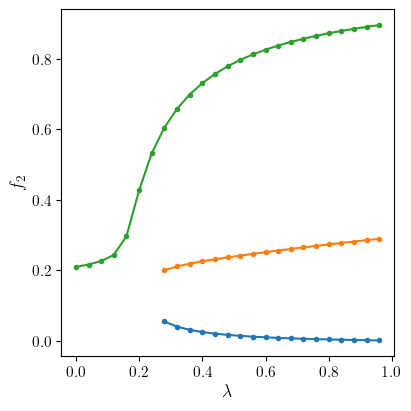

In [28]:
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=f'$\lambda$', ylabel=f'$f_2$')

# for sol_label,fs in sols.items():
#     numls = len(fs[2])
#     lsAux = ls[len(ls)-numls:]
#     ax.plot(lsAux, fs[2])

for sol_id,fs in sols_ordered.items():
    ax.plot(ls[len(ls)-len(fs[2]):], fs[2], marker='.', lw=0)

In [24]:
ls[len(ls)-numls_short]

0.28